In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
raw_data=pd.read_csv('../data/housing.csv')

In [3]:
raw_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326717,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


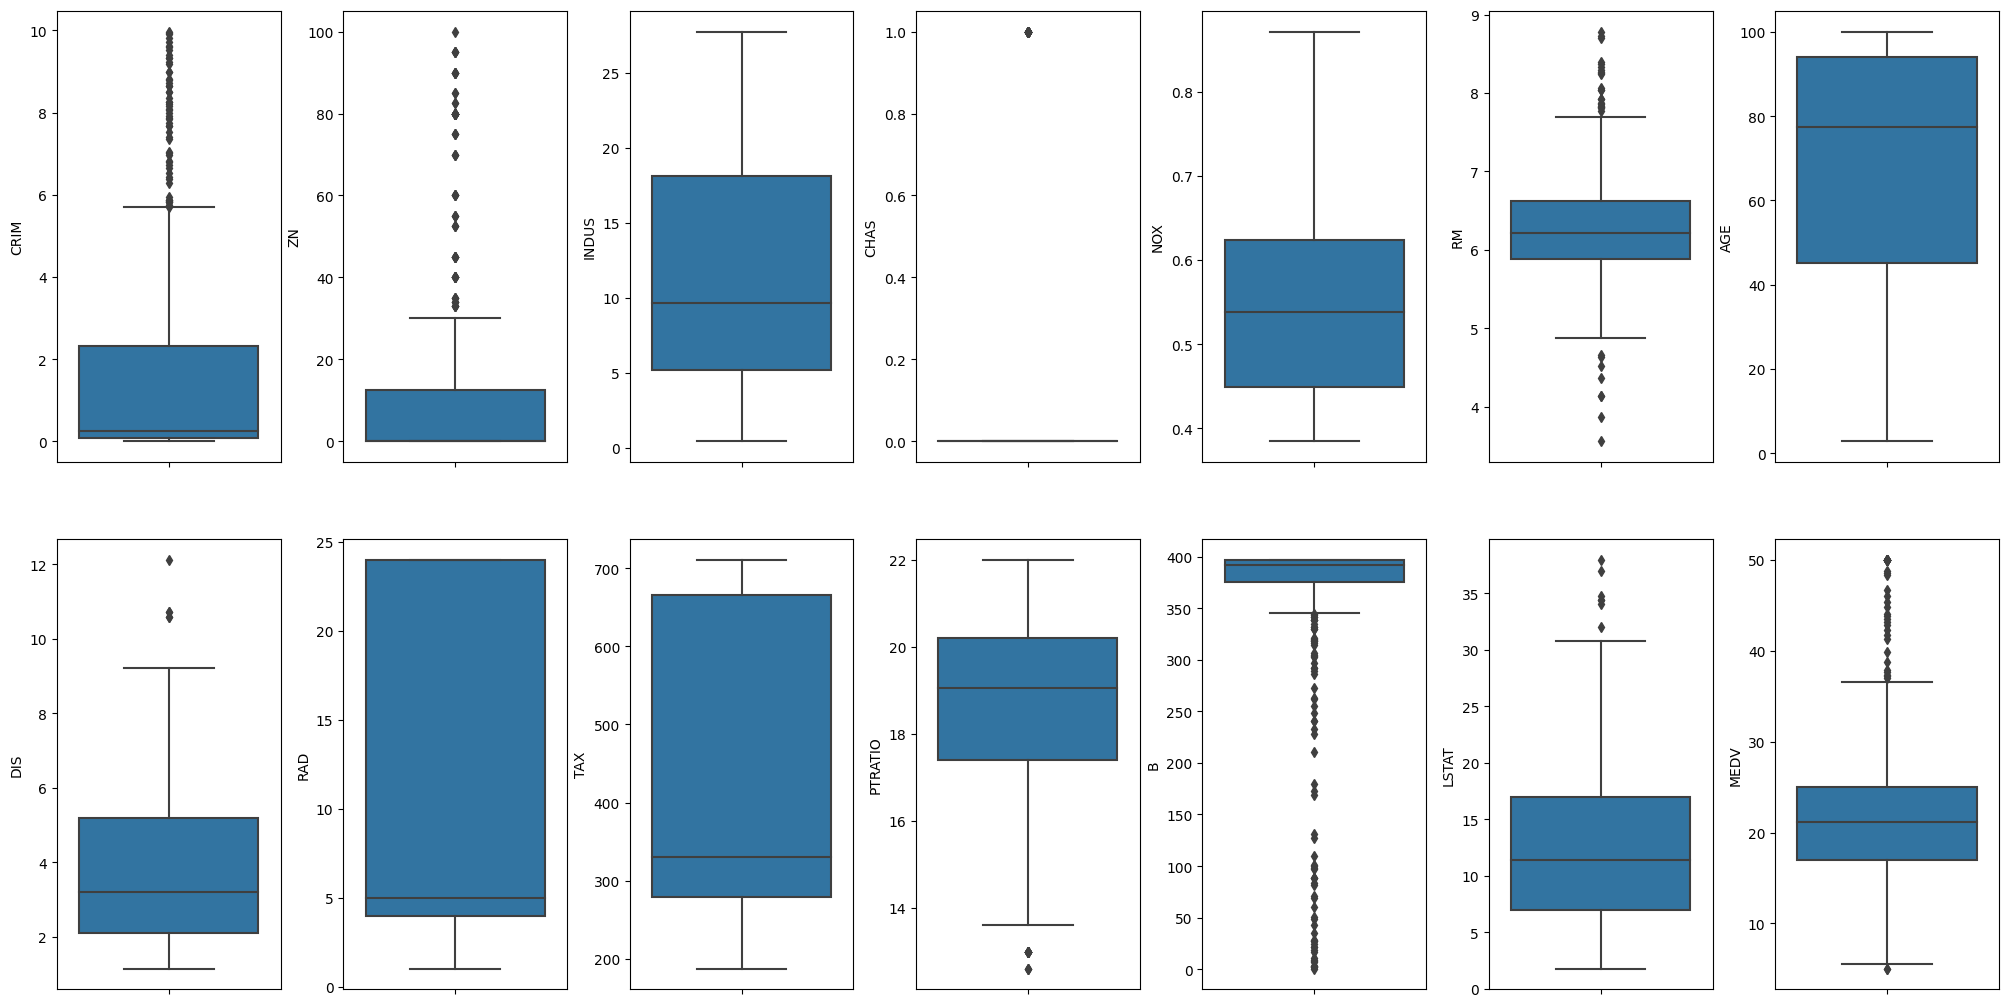

In [4]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in raw_data.items():
    sns.boxplot(y=k, data=raw_data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [22]:
for k,v in raw_data.items():
    q1=v.quantile(0.25)
    q3=v.quantile(0.75)
    irq=q3-q1
    v_col=v[(v<=q1-1.5*irq)|(v>=q3+1.5*irq)]
    perc=np.shape(v_col)[0]*100/np.shape(raw_data)[0]
    print(f"Column {k:s} outliers : {perc:.2f}%")

Column CRIM outliers : 11.66%
Column ZN outliers : 13.44%
Column INDUS outliers : 0.00%
Column CHAS outliers : 100.00%
Column NOX outliers : 0.00%
Column RM outliers : 5.93%
Column AGE outliers : 0.00%
Column DIS outliers : 0.99%
Column RAD outliers : 0.00%
Column TAX outliers : 0.00%
Column PTRATIO outliers : 2.96%
Column B outliers : 15.22%
Column LSTAT outliers : 1.38%
Column MEDV outliers : 7.91%


In [24]:
raw_data=raw_data[~(raw_data['MEDV']>=50.0)]

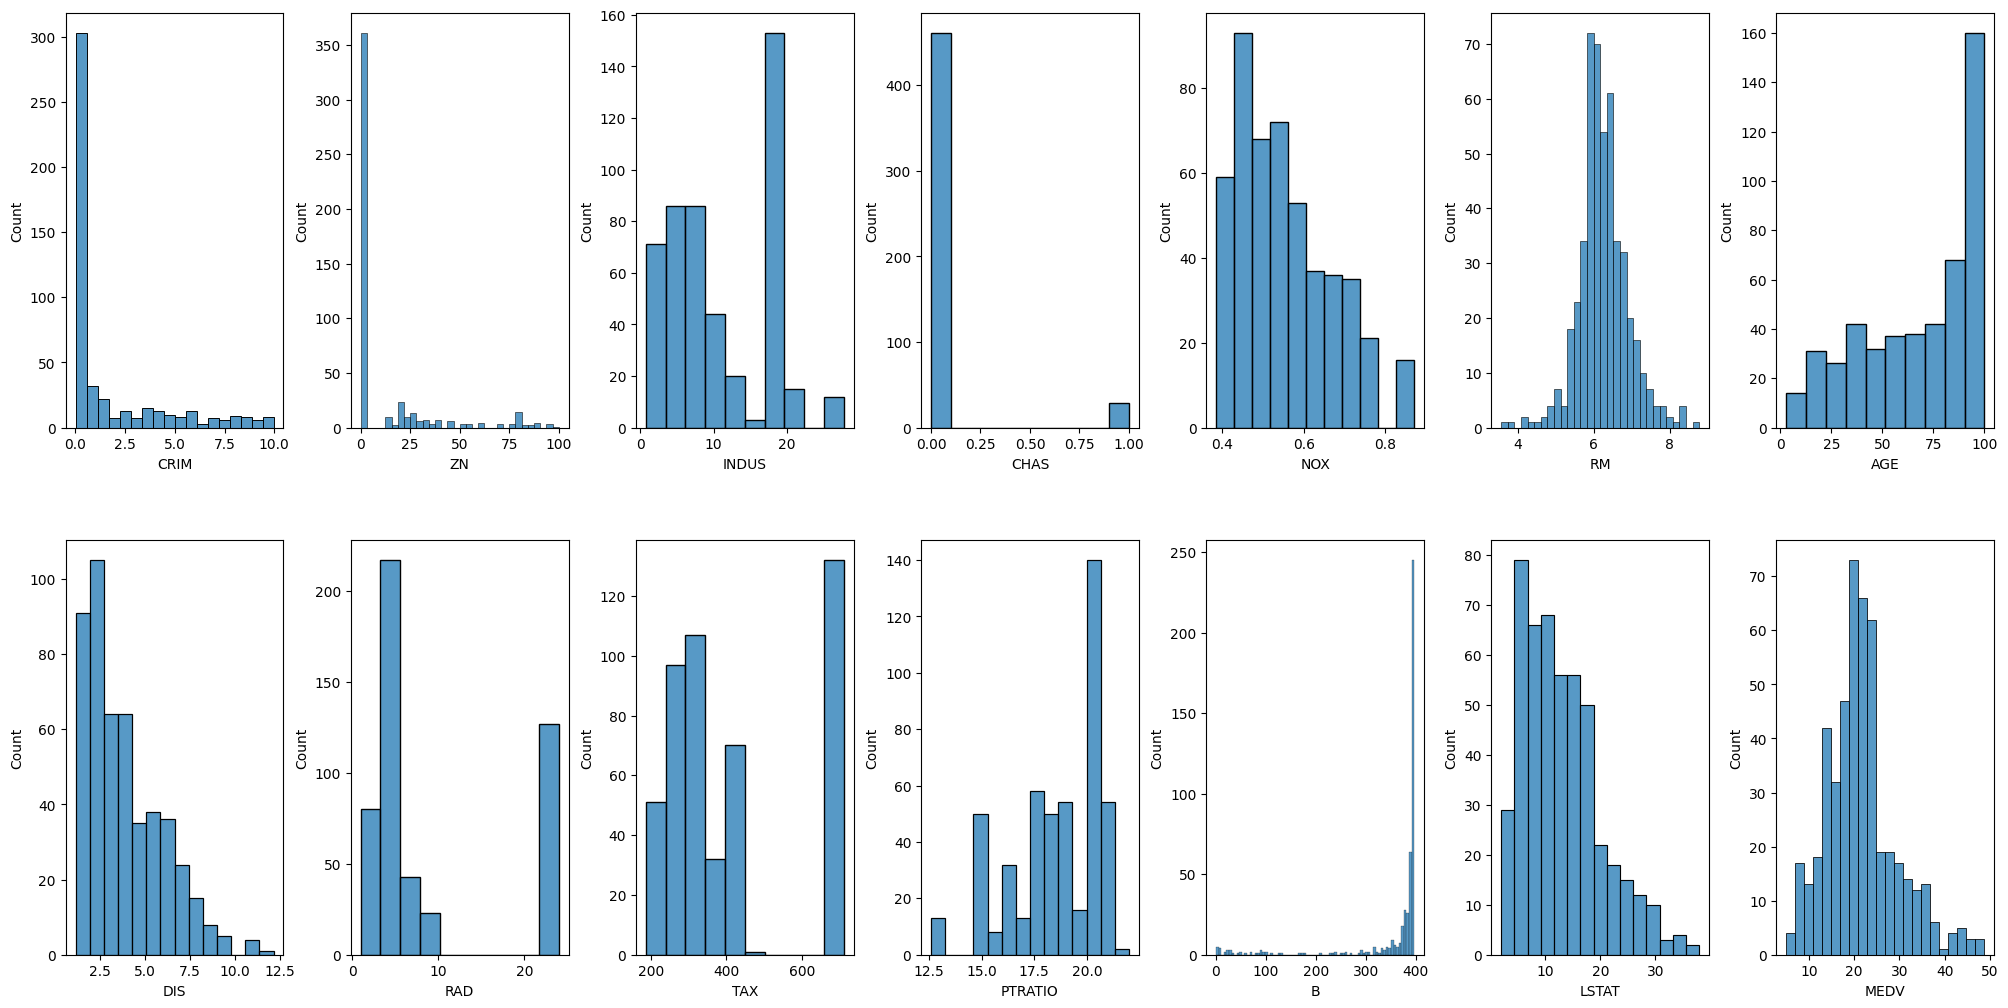

In [30]:
fig, ax=plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for k,v in raw_data.items():
    sns.histplot(v,ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

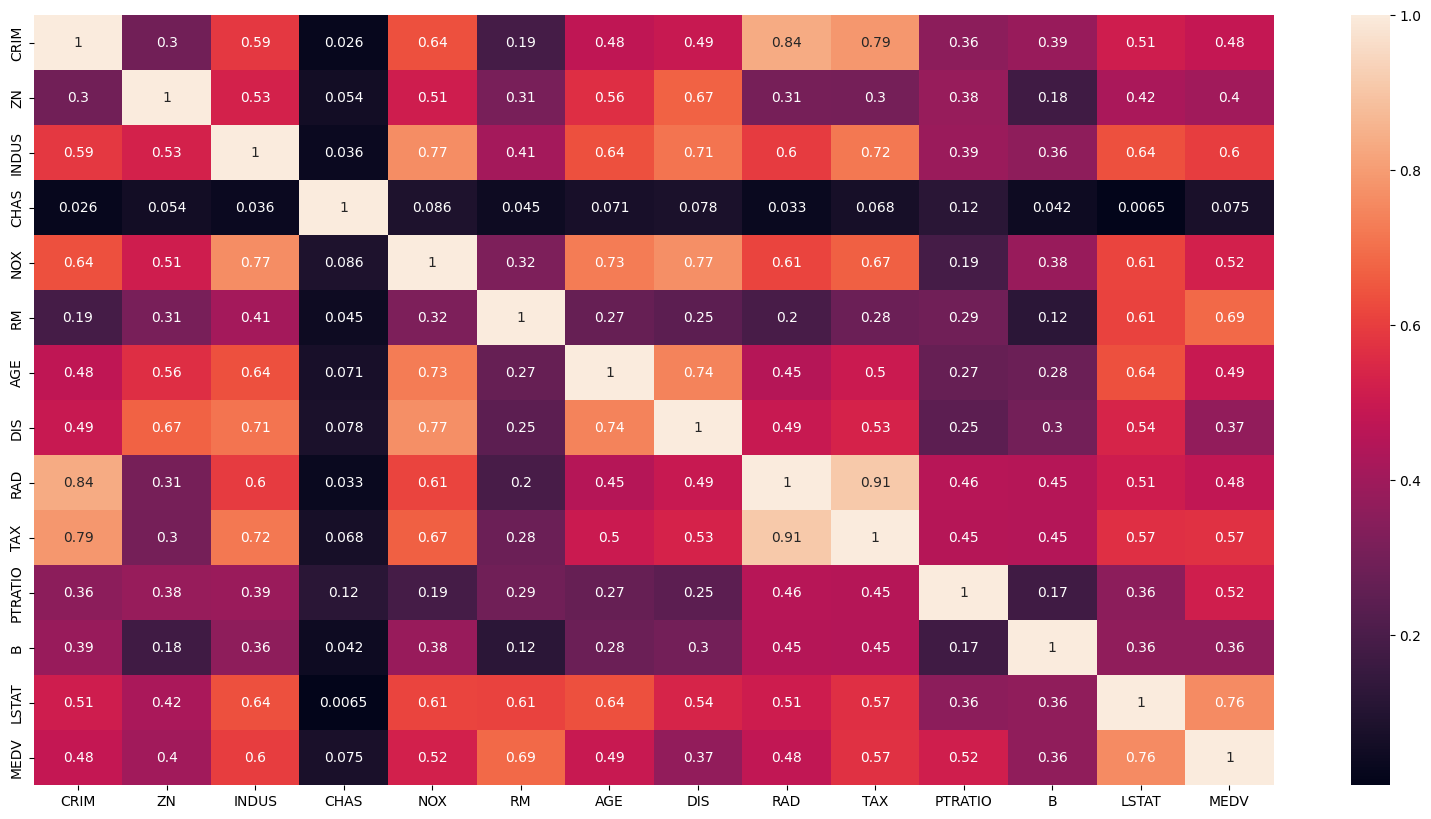

In [32]:
plt.figure(figsize=(20, 10))
sns.heatmap(raw_data.corr().abs(),  annot=True)